In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

# Code only works with YAXArrays 0.4.6
Pkg.add(PackageSpec(name ="YAXArrays", version="0.4.6"))
using YAXArrays
using Zarr
using Dates

  Activating project at `~/git/spatio_temporal_data-rainforest_development`


    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/git/spatio_temporal_data-rainforest_development/Project.toml`
  No Changes to `~/git/spatio_temporal_data-rainforest_development/Manifest.toml`


In [3]:

include("src/rainforest_lib.jl")
using .Rainforestlib

lc = Rainforestlib.get_lcc_datacube()
filtered_dc = Rainforestlib.rough_spatial_filter(lc; time_bounds = (Date(2010), Date(2021)))

#=======================#

include("src/LCCSClasses.jl")
using .LCCSClasses

# set a set of accepted values
rainforest_values = Set(LCCSClasses.categories["rainforest"].lccs_classes)

forest_values = Set(LCCSClasses.categories["forest"].lccs_classes)

all_forest_values = union(forest_values, rainforest_values)


Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

In [9]:
include("src/rainforest_lib.jl")
using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

using Colors, ColorSchemes

searched_classes = filter(p -> first(p) == "rainforest" || first(p) == "forest", Rainforestlib.LCCSClasses.categories)

accepted_values = Set{String}()
for (key, value) in searched_classes
    accepted_values = union(accepted_values, searched_classes[key].lccs_classes)
end

accepted_values

# bitmask = Rainforestlib.build_bitmask(filtered_dc[:, :, 1], accepted_values; set_nan = false)
custom_colormap = [RGB(1/length(searched_classes)*i, 1/length(searched_classes)*(length(searched_classes)-i), 1/length(searched_classes)*(length(searched_classes)-i)) for i in 1:length(searched_classes)]


local_figure = Rainforestlib.build_figure_by_categories(filtered_dc, searched_classes; colormap = custom_colormap, colorrange = (0,1), set_nan = true)


Set([0.2, 0.1])

GLFW.GLFWError: GLFWError (NOT_INITIALIZED): The GLFW library is not initialized

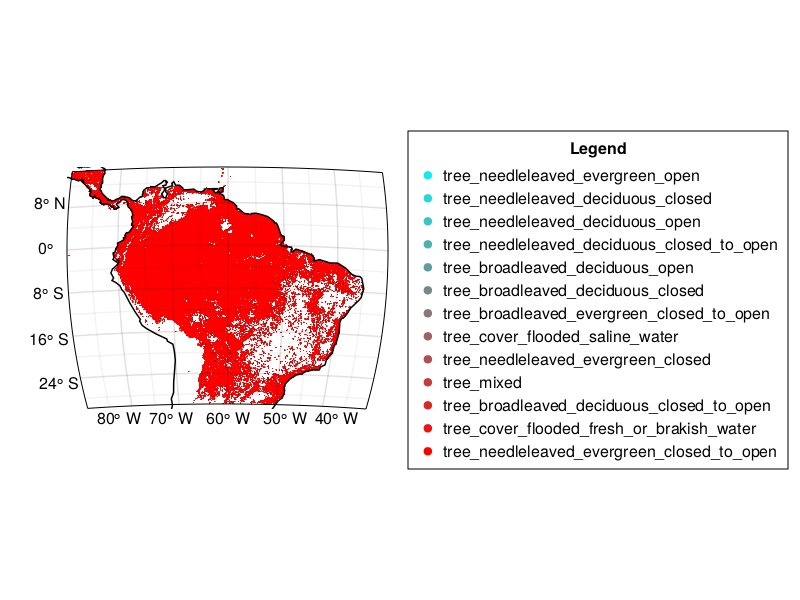

In [21]:
include("src/rainforest_lib.jl")
using .Rainforestlib

# using Colors, ColorSchemes

searched_classes = all_forest_values

custom_colormap = [RGB(1/length(searched_classes)*i, 1/length(searched_classes)*(length(searched_classes)-i), 1/length(searched_classes)*(length(searched_classes)-i)) for i in 1:length(searched_classes)]
# custom_colormap = [
#     RGB(1.0, 1.0, 1.0),  # Red
#     RGB(0.0, 0.0, 1.0),  # Blue
#     RGB(0.0, 1.0, 0.0)   # Green
# ]

local_figure = Rainforestlib.build_figure_by_lcc_classes(filtered_dc, all_forest_values; colormap = custom_colormap, colorrange = (0,1), set_nan = true)


using CairoMakie

# lins = [lines!(xs, sin.(xs .* i), color = color)
#     for (i, color) in zip(1:3, [:red, :blue, :green])]

xs = 0:0.5:10
ys = sin.(xs)

points = [scatter!(xs, sin.(xs .* i), color = color)
    for (i, color) in zip(1:length(custom_colormap), custom_colormap)]

# xs = 0:0.1:10
# lins = [lines!(xs, sin.(xs .* i), color = color)
#     for (i, color) in zip(1:3, [:red, :blue, :green])]

# xs = 0:0.1:10
# lins = [lines!(xs, sin.(xs .+ 3v), color = RGBf(v, 0, 1-v)) for v in 0:0.1:0.2]

Legend(
    local_figure[1, 2], 
    points,
    ["$lcss_class" for lcss_class in searched_classes],
    "Legend",
    tellheight = false,
    tellwidth = false,
    # margin = (110, 10, 50, 10),
    # halign = :left, valign = :bottom, orientation = :vertical
)

local_figure
